# OCR with Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## 1. Data Load

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [4]:
def view_digit(index, X,y):
    label = y[index]
    image = X[index,:].reshape([28, 28])
    plt.title(f'Label: {label}' )
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

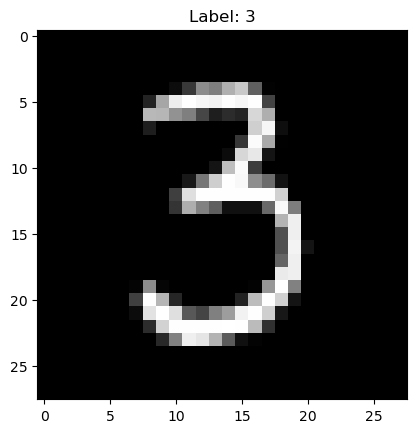

In [6]:
view_digit(50, X_train, y_train)

## 2. Model Training

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])


In [6]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


2024-10-22 15:12:25.968689: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 42s 24ms/step - loss: 0.1965 - accuracy: 0.9400 - val_loss: 0.0527 - val_accuracy: 0.9866
Epoch 2/10
1719/1719 [==============================] - 44s 26ms/step - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.0405 - val_accuracy: 0.9892
Epoch 3/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0480 - val_accuracy: 0.9874
Epoch 4/10
1719/1719 [==============================] - 70s 41ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0321 - val_accuracy: 0.9928
Epoch 5/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0321 - val_accuracy: 0.9910
Epoch 6/10
1719/1719 [==============================] - 63s 37ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 7/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0342 - val_accura

[0.031077584251761436, 0.9925000071525574]

In [8]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss, test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0311 - accuracy: 0.9925
0.031077584251761436 0.9925000071525574


313/313 [==============================] - 1s 4ms/step
Predicted Label: 1


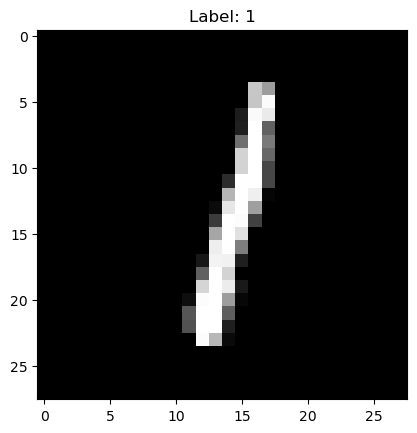

Predicted Label: 7


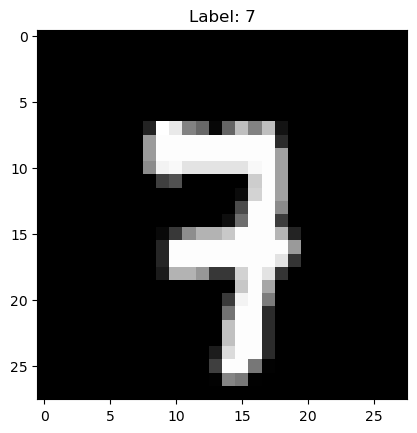

Predicted Label: 6


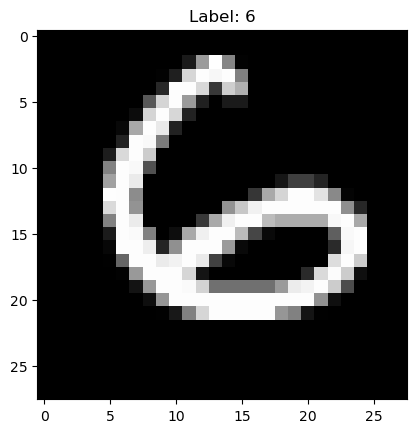

Predicted Label: 6


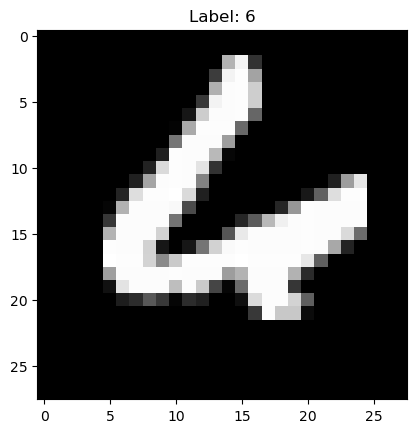

Predicted Label: 5


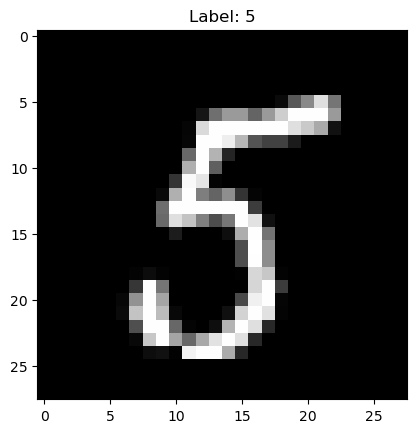

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test).argmax(axis=1)

# Mostrar algunas predicciones y las etiquetas reales
num_images = 5  # Número de imágenes a mostrar
indices = np.random.choice(len(X_test), num_images, replace=False)

for index in indices:
    print(f'Predicted Label: {y_pred[index]}')
    view_digit(index, X_test, y_test)

In [13]:
# Guardar el modelo en formato HDF5 (.h5)
model.save('../models/ocr_model.h5')

## 3. Load Model

In [16]:
model = keras.models.load_model('../models/ocr_model.h5')

In [22]:
single_image = X_test[0]
single_image = single_image[np.newaxis, ...]


1/1 [==============================] - 0s 78ms/step


array([[4.5518984e-16, 1.1301850e-11, 3.5091838e-13, 2.9890769e-12,
        2.6125423e-14, 2.9822272e-15, 8.1876512e-22, 1.0000000e+00,
        2.1373430e-15, 8.1084766e-09]], dtype=float32)

In [24]:
predicted_prob = model.predict(single_image)
predicted_label = predicted_prob.argmax(axis=1)[0]

print(predicted_prob)
print(predicted_label)


1/1 [==============================] - 0s 39ms/step
[[4.5518984e-16 1.1301850e-11 3.5091838e-13 2.9890769e-12 2.6125423e-14
  2.9822272e-15 8.1876512e-22 1.0000000e+00 2.1373430e-15 8.1084766e-09]]
7


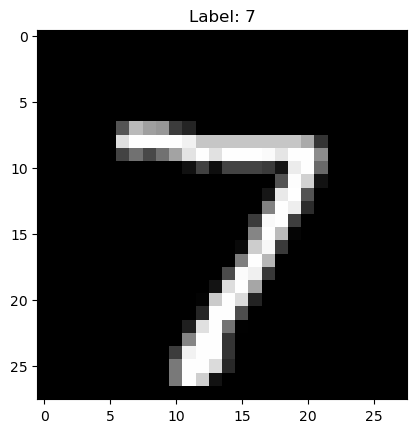

In [25]:
view_digit(0, X_test, y_test)